# Marine Heatwave Classification & Data Wrangling

### 1. Import Python libraries 

In [98]:
get_ipython().magic('matplotlib inline')
# Load Libraries
import numpy as np
import numpy.ma as ma
import os
import matplotlib.pyplot as plt
import scipy as sp
import datetime 
from datetime import date
import time 
import pandas as pd
import netCDF4
from netCDF4 import Dataset
import sys
from mpl_toolkits.basemap import Basemap, cm

### 2. Set your local working directory where netCDF files are stored 

In [85]:
# Set Path
path = "/users/Scannell/Documents/projects/2018_MarineHeatwaveTracker/Data/OISST-AVHRR-only" #specify path where dats is stored
os.chdir(path) # change working directory to new path 
#print(os.getcwd()) # print working directory

dir = os.listdir(path) # list all files in this directory
sys.getsizeof(dir) # memory size of the object
#print("number of files = ", len(dir))



440

### 3. Load data by year and store in t-y-x global grid

/users/Scannell/Documents/projects/2018_MarineHeatwaveTracker/Data/OISST-AVHRR-only/sst.day.mean.2000.v2.nc
(u'time', (u'time',), 366)
(u'lat', (u'lat',), 720)
(u'lon', (u'lon',), 1440)
(u'sst', (u'time', u'lat', u'lon'), 379468800)
/users/Scannell/Documents/projects/2018_MarineHeatwaveTracker/Data/OISST-AVHRR-only/sst.day.mean.2001.v2.nc
(u'time', (u'time',), 365)
(u'lat', (u'lat',), 720)
(u'lon', (u'lon',), 1440)
(u'sst', (u'time', u'lat', u'lon'), 378432000)


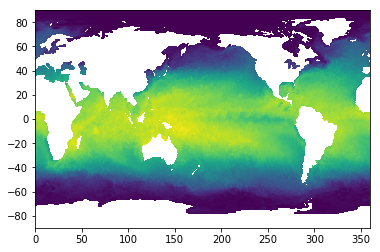

In [132]:
sst_global = np.empty((1,720,1440))
#sst_global[:] = np.nan
sst_time = np.empty((1))

for i in np.arange(2000,2002):

    fp = path + "/sst.day.mean.%d.v2.nc" % i
    print fp
    file2read = Dataset(fp) # reading the nc file and creating a dataset
    """ this dataset has components in the form nt, nz, ny, nx """
    #print file2read.variables.keys() # show list of variables
    #print(file2read['sst'].shape)
    for i in file2read.variables:
            print(file2read[i].name, file2read[i].dimensions, file2read[i].size)

    t = file2read.variables['time'][:] # days since 1800-01-01 00:00:00
    #print time.shape, type(time), time
    #time = time.astype(int)

    ref = datetime.date(1800,1,1).toordinal()
    TIME = ref + t
    sst = file2read.variables['sst'][:]
    #sst = np.transpose(sst,(0,1,2))
    lon = file2read.variables['lon'][:]
    lat = file2read.variables['lat'][:]

    
    sst_global = ma.concatenate([sst_global, sst]) # Concatenate function that preserves input mask
    sst_time = np.concatenate([sst_time,TIME])

sst_time = sst_time[1:]
sst_global = sst_global[1:,:,:]
    
# Quickly check data
plt.pcolormesh(lon, lat, sst_global[0,:,:]); plt.show(block=False)


In [127]:
# Not really sure how to save variables here

#print file2read.variables
#m = sst_global.view(ma.MaskedArray)
#np.savez('oisst_2000_2017.npz', sst_global=sst_global, sst_time=sst_time, lon=lon, lat=lat, m=m) 


(716, 720, 1440)


### 4. Deal with time

In [131]:
T = len(sst_time)
year = np.zeros((T))
month = np.zeros((T))
day = np.zeros((T))
doy = np.zeros((T))

for i in range(len(sst_time)):
    year[i] = date.fromordinal(int(sst_time[i])).year
    month[i] = date.fromordinal(int(sst_time[i])).month
    day[i] = date.fromordinal(int(sst_time[i])).day
    #doy[i] = date.fromordinal(int(TIME[i])).timetuple().tm_yday

# Leap-year baseline for defining day-of-year values
year_leapYear = 2012 # This year was a leap-year and therefore doy in range of 1 to 366
t_leapYear = np.arange(date(year_leapYear, 1, 1).toordinal(),date(year_leapYear, 12, 31).toordinal()+1)
dates_leapYear = [date.fromordinal(tt.astype(int)) for tt in t_leapYear]
month_leapYear = np.zeros((len(t_leapYear)))
day_leapYear = np.zeros((len(t_leapYear)))
doy_leapYear = np.zeros((len(t_leapYear)))
for tt in range(len(t_leapYear)):
    month_leapYear[tt] = date.fromordinal(t_leapYear[tt]).month
    day_leapYear[tt] = date.fromordinal(t_leapYear[tt]).day
    doy_leapYear[tt] = t_leapYear[tt] - date(date.fromordinal(t_leapYear[tt]).year,1,1).toordinal() + 1
# Calculate day-of-year values
for tt in range(T):
    doy[tt] = doy_leapYear[(month_leapYear == month[tt]) * (day_leapYear == day[tt])]

# Constants (doy values for Feb-28 and Feb-29) for handling leap-years
feb28 = 59
feb29 = 60


### 5. Create SST climatology 

In [438]:
tClim = np.arange(date(2000,1,1).toordinal(), date(2017,12,31).toordinal())
tempClim = alternateClimatology[1]
TClim = len(tClim)
yearClim = np.zeros((TClim))
monthClim = np.zeros((TClim))
dayClim = np.zeros((TClim))
doyClim = np.zeros((TClim))
for i in range(TClim):
    yearClim[i] = date.fromordinal(tClim[i]).year
    monthClim[i] = date.fromordinal(tClim[i]).month
    dayClim[i] = date.fromordinal(tClim[i]).day
    doyClim[i] = doy_leapYear[(month_leapYear == monthClim[i]) * (day_leapYear == dayClim[i])]


NameError: name 'alternateClimatology' is not defined